In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import numpy as np
import datetime
import xarray as xr

### 读取micaps4数据
**read_griddata_from_micaps4(filename,grid=None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从micaps第3类数据文件中读取网格数据  

**参数说明：**  
 **filename**: Micaps4格式的文件  路径和文件名   
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。     
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据文件内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据文件内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则设0  
 **data_name**: 返回的站点数据的member维度将设置为data_name  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量    


**调用示例**

In [2]:
filename = r"H:\test_data\input\meb\m4.txt"
grd = meb.read_griddata_from_micaps4(filename)
print(grd)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 281, lon: 361)>
array([[[[[[26.99, ..., 26.96],
           ...,
           [ 1.02, ...,  7.08]]]]]])
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-05-17
  * dtime    (dtime) int32 24
  * lat      (lat) float64 -10.0 -9.75 -9.5 -9.25 -9.0 ... 59.25 59.5 59.75 60.0
  * lon      (lon) float64 60.0 60.25 60.5 60.75 ... 149.2 149.5 149.8 150.0
Attributes:
    dtime_type:  hour


In [3]:
grid = meb.grid([70,140,0.25],[20,50,0.25])
print(grid)
grd = meb.read_griddata_from_micaps4(filename,grid,level = 1000,time = "2020032308",dtime = 48,data_name = "ec",show = True)
print(grd) #裁剪了部分数据，重置了层次，时间，时效和成员名称等信息

members:['data0']
levels:[0]
gtime:['20990101000000', '20990101000000', '1h']
dtimes:[0]
glon:[70, 140.0, 0.25]
glat:[20, 50.0, 0.25]

Traceback (most recent call last):
  File "h:\task\develop\python\git\meteva\meteva\base\io\read_griddata.py", line 120, in read_griddata_from_micaps4
    da1 = meteva.base.interp_gg_linear(da, grid)
  File "h:\task\develop\python\git\meteva\meteva\base\fun\interpolating.py", line 313, in interp_gg_linear
    grd_new.values[m,i,j,k,:,:] = dat2
ValueError: could not broadcast input array from shape (281,361) into shape (121,281)

could not broadcast input array from shape (281,361) into shape (121,281)
None


### 读取netcdf数据
**read_griddata_from_nc(filename,grid = None,value_name = None,member_dim = None,level_dim = None,time_dim = None,dtime_dim = None,lat_dim = None,lon_dim = None,level=None, time=None, dtime=None, data_name="data0",show = False)**  
从netdf类数据文件中读取网格数据,但并非将nc文件中所有的内容都同时读入，而是仅只读取其中一个物理量，将其内容放置在本程序库支持的包含6维网格的网格数据内。  

**参数说明：**  
 **filename**: netcdf格式的文件  路径和文件名   
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **value_name**: 在nc文件中，要读取的要素名称，如果value_name是None，就通过程序自动判断所要读取的要素名称，方法是排除time，latitude，longitude等时空坐标信息量之后的物理量   
 **member_dim**: 在nc文件中，代表集合成员维度的坐标量的名称， nc文件中没有集合维度，该参数可缺省。  
 **level_dim**:  在nc文件中，代表垂直层次维度的坐标量的名称， 该参数缺省时，自动以文件中名称为"level"的变量作为层次坐标。  
 **time_dim**:  在nc文件中，代表时间维度的坐标量的名称，该参数缺省时，会自动以文件中名称为"time"的变量作为时间坐标。  
 **dtime_dim**:  在nc文件中，代表时效维度的坐标量的名称， nc文件中没有时效维度，该参数可缺省。  
 **lat_dim**: 在nc文件中，代表经向维度的坐标量的名称，该参数缺省时，会自动以文件中名称为"lat"或"latitude"的变量作为东西向坐标。  
 **lon_dim**: 在nc文件中，代表纬向维度的坐标量的名称，该参数缺省时，会自动以文件中名称为"lon"或"longtitue"的变量作为南北向坐标。  
  **level**: 当level维度size = 1，且该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据文件内容自动设置  
 **time**: 当time维度size = 1，且该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据文件内容自动设置  
 **dtime**: 当dtime维度size = 1，且该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据文件内容自动设置  
 **data_name**: 当member维度size = 1时，返回的站点数据的member维度的坐标将设置为data_name，否则根据文件内容自动设置  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息 
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量      


**调用示例**

In [4]:
filename = r"H:\test_data\input\meb\test.nc"
dataarray = xr.open_dataset(filename)  #通过xarray程序库读取nc文件中的所有内容
print(dataarray)

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 1, longitude: 1441, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2001-03-01
  * level      (level) int32 -2147483647
  * latitude   (latitude) float32 -9.999992 -9.874992 ... 79.87501 80.00001
  * longitude  (longitude) float32 0.0 0.125 0.25 0.375 ... 179.75 179.875 180.0
Data variables:
    data       (time, level, longitude, latitude) float32 ...
Attributes:
    Conventions:   COARDS
    institution:   National Meteorological Center OF CMA
    Product:       ECMWF细网格产品
    ForecastHour:  024
    RunTime:       19111608


In [5]:
grd = meb.read_griddata_from_nc(filename)
print(grd) #读取后自动以time,level,latitude,longitude作为坐标变量，并增加了member和dtime的维度（size=1), 返回结果中数据名称设置为data0

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 721, lon: 1441)>
array([[[[[[ 22.3125, ...,  26.9375],
           ...,
           [ -4.    , ..., -12.75  ]]]]]], dtype=float32)
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) int32 -2147483647
  * time     (time) datetime64[ns] 2001-03-01
  * dtime    (dtime) int32 0
  * lat      (lat) float32 -9.999992 -9.874992 -9.749992 ... 79.87501 80.00001
  * lon      (lon) float32 0.0 0.125 0.25 0.375 ... 179.625 179.75 179.875 180.0
Attributes:
    units:         ℃
    effectiveNum:  1
    long_name:     2m温度


In [6]:
meb.set_griddata_coords(grd,member_list = ["ECMWF"],level_list = [0],dtime_list = [24]) 
print(grd)  #通过set_coords可以重置每个坐标维度的信息

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 721, lon: 1441)>
array([[[[[[ 22.3125, ...,  26.9375],
           ...,
           [ -4.    , ..., -12.75  ]]]]]], dtype=float32)
Coordinates:
  * member   (member) <U5 'ECMWF'
  * level    (level) int32 0
  * time     (time) datetime64[ns] 2001-03-01
  * dtime    (dtime) int32 24
  * lat      (lat) float32 -9.999992 -9.874992 -9.749992 ... 79.87501 80.00001
  * lon      (lon) float32 0.0 0.125 0.25 0.375 ... 179.625 179.75 179.875 180.0
Attributes:
    units:         ℃
    effectiveNum:  1
    long_name:     2m温度


### 读取GDS服务器中的网格数据
**read_griddata_from_gds(ip,port,filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从GDS服务器中读取网格数据，将其内容放置在本程序库支持的包含6维网格的网格数据内。  

**参数说明：**  
 **ip** : 服务器地址   
 **port**:服务器端口  
 **filename**: 数据在服务器中的文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为data_name  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量     


**调用示例**

In [7]:
ip,port = meb.io.read_gds_ip_port( r"H:\test_data\input\meb\ip_port.txt")
grd = meb.read_griddata_from_gds(ip,port,r"ECMWF_HR/TMP_2M/20033008.024")
#meb.set_griddata_coords(grd,member_list = ["ECMWF_HR"],gtime = [datetime.datetime(2020,2,23,8,0)],dtime_list = [24])
print(grd)

ECMWF_HR/TMP_2M/20033008.024超出可读时间
None


In [8]:
grd = meb.read_griddata_from_gds(ip,port,r"mdfs:///ECMWF_ENSEMBLE/RAW/RAIN24/20040308.024") #读取集合预报的数据
#meb.set_griddata_coords(grd,member_list = ["ECMWF_HR"],gtime = [datetime.datetime(2020,2,23,8,0)],dtime_list = [24])
print(grd)

ECMWF_ENSEMBLE/RAW/RAIN24/20040308.024超出可读时间
None


### 读取GDS导出的网格数据文件
**read_griddata_from_gds_file(filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从GDS服务器中读取网格数据，将其内容放置在本程序库支持的包含6维网格的网格数据内。  

**参数说明：**  
 **filename**: 文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为data_name  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: 网格数据类变量    


**调用示例**

In [9]:
grd = meb.read_griddata_from_gds_file(r"H:/test_data/input/meb/test.gds")
meb.set_griddata_coords(grd,member_list = ["ECMWF_HR"],gtime = [datetime.datetime(2019,12,31,8,0)],dtime_list = [24])
print(grd)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 721, lon: 1441)>
array([[[[[[ 24.443943, ...,  28.006443],
           ...,
           [-23.181057, ..., -24.712307]]]]]], dtype=float32)
Coordinates:
  * member   (member) <U8 'ECMWF_HR'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-12-31T08:00:00
  * dtime    (dtime) int32 24
  * lat      (lat) float64 -10.0 -9.875 -9.75 -9.625 ... 79.63 79.75 79.88 80.0
  * lon      (lon) float64 0.0 0.125 0.25 0.375 0.5 ... 179.6 179.8 179.9 180.0
Attributes:
    dtime_type:  hour


# 从GDS中读取AWX云图数据
**read_AWX_from_gds(ip,port,filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从GDS服务器中读取网格云图数据，将其内容放置在本程序库支持的包含6维网格的网格数据内。  

**参数说明：**  
 **ip** : 服务器地址   
 **port**:服务器端口 
 **filename**: 文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。 
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为data_name  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量    


**调用示例**

In [10]:
grd = meb.read_AWX_from_gds(ip,port,r"SATELLITE/FY4A/L1/CHINA/C014/C014_20200323193836_FY4A.AWX")
print(grd)

unpack requires a buffer of 12 bytes
None


# 读取AWX云图数据¶
**read_griddata_from_AWX_file(filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从AWX格式文件中读取云图数据，将其内容放置在本程序库支持的包含6维网格的网格数据内。   
（目前部分AWX格式文件解析仍有问题，功能待完善） 
  
参数说明：  
 **filename**: 文件路径  
 **grid**: 格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为data_name  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 return: 网格数据类变量  

调用示例  

In [11]:
grd = meb.read_griddata_from_AWX_file(r"H:\test_data\input\meb\B13_20200229_2100_HMW8.AWX")
print(grd)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 2001, lon: 3501)>
array([[[[[[288.13, ..., 285.33],
           ...,
           [209.35, ..., 252.54]]]]]], dtype=float32)
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) object None
  * time     (time) object None
  * dtime    (dtime) object None
  * lat      (lat) float64 15.0 15.02 15.04 15.06 ... 54.94 54.96 54.98 55.0
  * lon      (lon) float64 70.0 70.02 70.04 70.06 ... 139.9 140.0 140.0 140.0
Attributes:
    dtime_type:  hour


### 从micaps11文件读取风场
**read_gridwind_from_micaps11(filename,grid = None,level = None,time = None,dtime = None,data_name = "",show = False)**  
从micaps11类文件中读取风场，将其内容放置在本程序库支持的包含6维网格的网格数据内，u和v分量放在在member维度。  

**参数说明：**  
 **filename**: 文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为["u"+data_name,"v"+data_name]    
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量     


**调用示例**

In [12]:
grd = meb.read_gridwind_from_micaps11(r"H:/test_data/input/meb/m11.024")
print(grd)

<xarray.DataArray 'wind' (member: 2, level: 1, time: 1, dtime: 1, lat: 281, lon: 361)>
array([[[[[[ 7.32, ...,  0.6 ],
           ...,
           [-1.83, ..., -6.01]]]]],




       [[[[[-9.29, ...,  2.68],
           ...,
           [-1.01, ...,  1.36]]]]]])
Coordinates:
  * member   (member) <U1 'u' 'v'
  * level    (level) object None
  * time     (time) object None
  * dtime    (dtime) object None
  * lat      (lat) float64 -10.0 -9.75 -9.5 -9.25 -9.0 ... 59.25 59.5 59.75 60.0
  * lon      (lon) float64 60.0 60.25 60.5 60.75 ... 149.2 149.5 149.8 150.0


# 从micaps2文件读取风场
**def read_gridwind_from_micaps2(filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show =False)**  
从micaps2类文件中读取风场，将其内容放置在本程序库支持的包含6维网格的网格数据内，u和v分量放在在member维度。  

**参数说明：**  
 **filename**: 文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。 
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为["u"+data_name,"v"+data_name]  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量    


**调用示例**

In [13]:
grd = meb.read_gridwind_from_micaps2(r"H:/test_data/input/meb/m2.024")
print(grd)

<xarray.DataArray 'wind' (member: 2, level: 1, time: 1, dtime: 1, lat: 141, lon: 181)>
array([[[[[[ -8.249577, ...,  -0.669819],
           ...,
           [  8.437695, ..., -14.480957]]]]],




       [[[[[  1.080219, ...,  -3.200663],
           ...,
           [ 14.109533, ..., -16.402324]]]]]])
Coordinates:
  * member   (member) <U1 'u' 'v'
  * level    (level) int32 0
  * time     (time) datetime64[ns] 2019-12-01
  * dtime    (dtime) int32 0
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... 58.5 59.0 59.5 60.0
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 148.5 149.0 149.5 150.0


# 从GDS文件读取风场
**read_gridwind_from_gds_file(filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从gds类文件中读取风场，将其内容放置在本程序库支持的包含6维网格的网格数据内，u和v分量放在在member维度。  

**参数说明：**  
 **filename**: 文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为["u"+data_name,"v"+data_name]  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量    


**调用示例**

In [14]:
grd = meb.read_gridwind_from_gds_file(r"H:/test_data/input/meb/test_wind.gds")
print(grd)

0
<xarray.DataArray 'wind' (member: 2, level: 1, time: 1, dtime: 1, lat: 361, lon: 720)>
array([[[[[[-0.644787, ..., -0.644787],
           ...,
           [ 5.955214, ...,  5.955214]]]]],




       [[[[[ 3.969433, ...,  3.969433],
           ...,
           [-3.330564, ..., -3.330564]]]]]])
Coordinates:
  * member   (member) <U6 'udata0' 'vdata0'
  * level    (level) float64 850.0
  * time     (time) datetime64[ns] 2020-01-05T08:00:00
  * dtime    (dtime) int32 0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5


# 从GDS读取风场
**read_gridwind_from_gds(ip,port,filename,grid = None,level = None,time = None,dtime = None,data_name = "data0",show = False)**  
从gds中读取风场，将其内容放置在本程序库支持的包含6维网格的网格数据内，u和v分量放在在member维度。  

**参数说明：**  
 **ip** : 服务器地址   
 **port**:服务器端口  
 **filename**: 数据在服务器中的文件路径     
 **grid**:  格点的经纬度信息，默认为：None,如果有传入grid信息，需要使用双线性插值进行提取。  
 **level**: 层次，如果该参数不为None，返回的站点数据中level维度设置为该参数值，否则根据数据内容自动设置  
 **time**: 时间，如果该参数不为None，返回的站点数据中time维度设置为该参数值，否则根据数据内容自动设置  
 **dtime**: 时效，如果该参数不为None，返回的站点数据中dtime维度设置为该参数值，否则根据数据内容自动设置  
 **data_name**: 返回的站点数据的member维度将设置为["u"+data_name,"v"+data_name]  
 **show**: show = True时，会在屏幕中打印数据的输入文件路径信息  
 **return**: [网格数据类](https://www.showdoc.cc/meteva?page_id=3975600815874861)变量    

**调用示例**

In [15]:
grd = meb.io.read_gridwind_from_gds(ip,port,r"ECMWF_HR/WIND/850/20033008.024")
print(grd)

None


In [16]:
grd = meb.io.read_gridwind_from_gds(ip,port,r"mdfs:///ECMWF_ENSEMBLE/RAW/WIND_10M/20040308.000") #读取集合预报的风场
print(grd)  

None


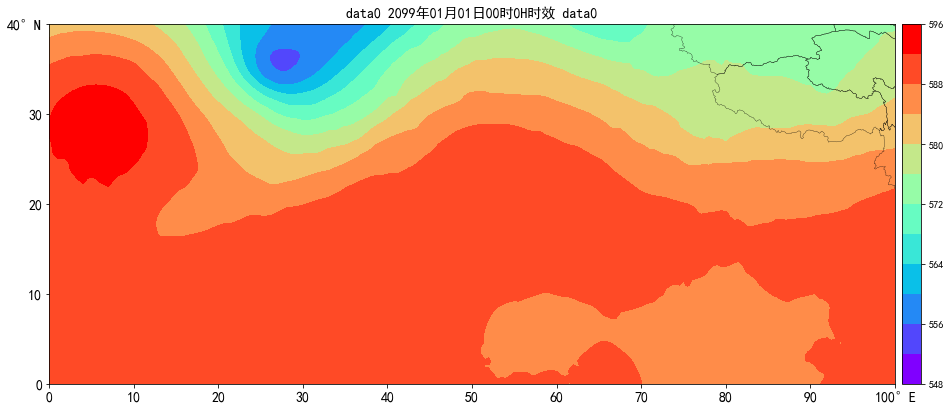

In [24]:
ip = "10.20.65.64"
port = 8080
path = "GRAPES_GFS/HGT/500/20050502.006"
grid0 = meb.grid([0, 100, 0.5], [0, 40, 0.5])
grd = meb.read_griddata_from_gds(ip,port,path,grid=grid0)
meb.tool.plot_tools.contourf_2d_grid(grd)